In [1]:
import pandas as pd

In [3]:
data =pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv")

In [4]:
data

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789
...,...,...,...,...,...,...,...,...,...
3068,2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683
3069,2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658
3070,2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588
3071,2023-05-30,0.441455,13.893519,22.615530,37.224537,36.185971,35.859532,20.888525,1.181818


In [2]:
pip install scikit-learn


In [5]:
X=data[["CO","NOX","SO2"]]
y=data["PM25"]

In [6]:
split_index= int(len(data)*0.8)

In [7]:
x_train=X.iloc[:split_index]
x_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
y_pred=model.predict(x_test)

In [11]:
coeficientes= pd.DataFrame({
    "variable":X.columns,
    "coeficientes":model.coef_})

In [12]:
print(coeficientes)

  variable  coeficientes
0       CO     13.394922
1      NOX      0.067212
2      SO2      0.840904


In [13]:
print(f"Intercepto:{model.intercept_}")

Intercepto:9.14465160979532


In [14]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [15]:
r2=r2_score(y_test,y_pred)

In [16]:
r2

0.36448052999862923

In [17]:
rmse=mean_squared_error(y_test, y_pred, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
rmse

5.534238754299773

In [19]:
mae=mean_absolute_error(y_test,y_pred)


In [20]:
mae

4.161644323460395

In [21]:
import matplotlib.pyplot as plt

In [22]:
residuos=y_test-y_pred

Text(0, 0.5, 'frecuencia')

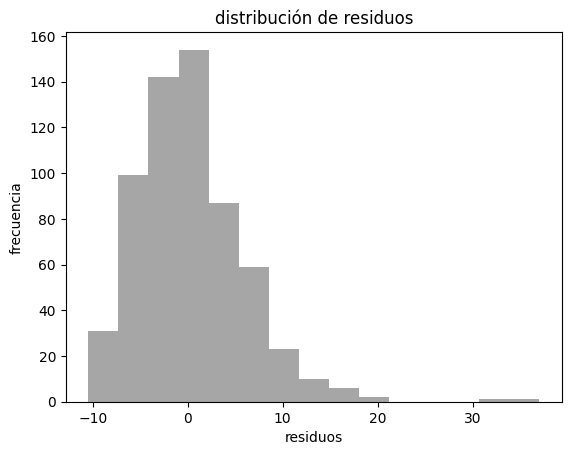

In [23]:
plt.hist(residuos,bins=15, color="gray",alpha=0.7)
plt.title("distribución de residuos")
plt.xlabel("residuos")
plt.ylabel("frecuencia")


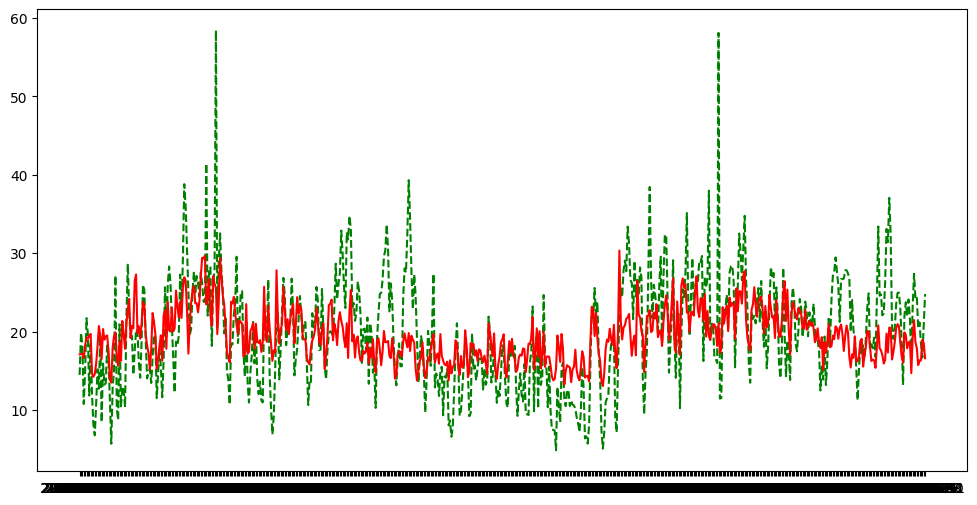

In [24]:
plt.figure(figsize=(12,6))
plt.plot(data.iloc[split_index:]["fecha"],y_test,linestyle="--",color="green")
plt.plot(data.iloc[split_index:]["fecha"],y_pred,linestyle="-",color="red")

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [35]:
data=data.sort_values(by='fecha')
split_index=int(len(data)*0.8)
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

In [43]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42) # Corrected the typo in random_state
rf_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [44]:
y_pred=rf_model.predict(x_test)

In [45]:
y_pred

array([19.21994732, 19.27724448, 18.05712152, 14.86640609, 16.96607872,
       23.28705814, 16.95954319, 15.97527724, 16.20785841, 14.4350211 ,
       11.76475912, 11.72613245, 12.15287667, 19.43610132, 20.18091759,
       19.51793341, 15.33568211, 23.20439316, 17.54721772, 17.42616128,
       23.48460841, 17.2040452 ,  9.37030058,  8.01113912, 19.04978689,
       23.55008082, 23.07015001, 17.86381783, 15.83595988, 19.68558598,
       17.00097303, 19.10046612, 20.82314353, 19.27994416, 23.3862978 ,
       24.23002462, 25.42676098, 20.82403983, 24.02058541, 23.359741  ,
       25.53052761, 27.34330348, 23.69635305, 23.60545599, 19.02002288,
       23.84548092, 24.94474083, 24.23002462, 23.48460841, 22.64572069,
       16.03798198, 15.66538381, 18.79892651, 24.1729879 , 23.33078639,
       22.63206709, 15.69347664, 16.24432158, 19.6460596 , 20.90066569,
       16.72793506, 24.1729879 , 24.15151514, 19.57512762, 24.24563967,
       21.01226771, 21.04472625, 24.23002462, 22.60100093, 24.00

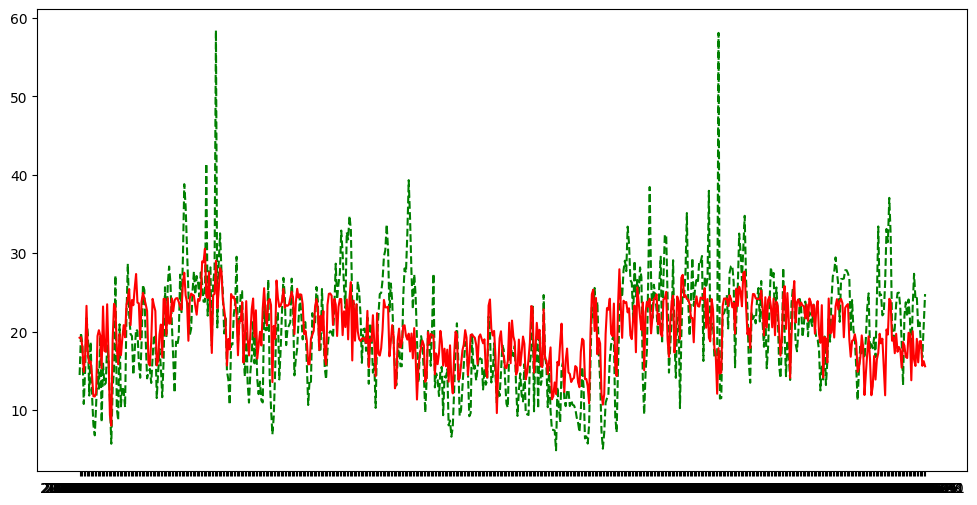

In [46]:
plt.figure(figsize=(12,6))
plt.plot(data.iloc[split_index:]["fecha"],y_test,linestyle="--",color="green")
plt.plot(data.iloc[split_index:]["fecha"],y_pred,linestyle="-",color="red")